<a href="https://colab.research.google.com/github/llskyhi/109-2_BigDataProgramming/blob/main/0420%E6%9C%9F%E4%B8%AD%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 0420期中考
# 請用 SportsAnalytics套件所提供的NBA數據進行分析(任選一年)
# • 利用order()函數,選一種類型的資料出來,由大到小排序(decreasing = T) Ex:GamesPlayed
# • 用subset()做欄位條件搜尋
# • 用grepl()做字串條件搜尋
# • 用ggplot畫出,四種不同類型的圖表(Exp:散佈圖、長條圖、折線圖...)
# • 檔案請命名為: 0420期中考,並上傳至github

In [29]:
install.packages(
  c(
    # 資料集
    "SportsAnalytics",
    # 畫圖用
    "ggplot2",
    # %>%用?
    "dplyr"
  )
)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(SportsAnalytics)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [32]:
data <- fetch_NBAPlayerStatistics("18-19")
colnames(data)
head(data, 4)

[1] "League"              "Name"                "Team"               
 [4] "Position"            "GamesPlayed"         "TotalMinutesPlayed" 
 [7] "FieldGoalsMade"      "FieldGoalsAttempted" "ThreesMade"         
[10] "ThreesAttempted"     "FreeThrowsMade"      "FreeThrowsAttempted"
[13] "OffensiveRebounds"   "TotalRebounds"       "Assists"            
[16] "Steals"              "Turnovers"           "Blocks"             
[19] "PersonalFouls"       "Disqualifications"   "TotalPoints"        
[22] "Technicals"          "Ejections"           "FlagrantFouls"      
[25] "GamesStarted"

,League,Name,Team,Position,GamesPlayed,TotalMinutesPlayed,FieldGoalsMade,FieldGoalsAttempted,ThreesMade,ThreesAttempted,⋯,Steals,Turnovers,Blocks,PersonalFouls,Disqualifications,TotalPoints,Technicals,Ejections,FlagrantFouls,GamesStarted
,<fct>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NBA,Alex Abrines,OKL,SG,31,588,56,157,41,127,⋯,17,14,6,53,0,165,1,0,0,2
2,NBA,Quincy Acy,PHO,SF,10,121,4,18,2,15,⋯,1,4,4,24,0,17,1,0,0,0
3,NBA,Jaylen Adams,ATL,PG,34,425,38,110,25,74,⋯,13,28,5,45,0,108,0,0,0,1
4,NBA,Steven Adams,OKL,C,80,2667,481,809,0,2,⋯,119,138,77,204,3,1108,2,0,0,80


In [59]:
filtered.data <-
# 總分排序
data[order(data$TotalPoints, decreasing = T), ] %>%
# 出場數>50且名字長度>=15
subset(
  GamesPlayed > 50 & grepl(pattern=".{15,}", Name)
)
head(filtered.data, 5)

,League,Name,Team,Position,GamesPlayed,TotalMinutesPlayed,FieldGoalsMade,FieldGoalsAttempted,ThreesMade,ThreesAttempted,⋯,Steals,Turnovers,Blocks,PersonalFouls,Disqualifications,TotalPoints,Technicals,Ejections,FlagrantFouls,GamesStarted
,<fct>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18,NBA,Gi Antetokounmpo,MIL,PF,72,2358,721,1248,52,203,⋯,92,268,110,232,2,1994,4,0,0,72
481,NBA,Karl-antho Towns,MIN,C,77,2544,681,1315,142,355,⋯,67,240,125,292,9,1880,8,0,0,77
354,NBA,Donovan Mitchell,UTA,SG,77,2598,661,1530,188,520,⋯,106,218,31,208,0,1829,1,0,0,77
8,NBA,Lamarcu Aldridge,SAN,PF,81,2689,684,1319,10,42,⋯,43,144,107,179,0,1727,1,0,0,81
434,NBA,D'angelo Russell,BRO,PG,81,2446,659,1517,234,635,⋯,99,253,20,141,0,1712,5,0,0,81


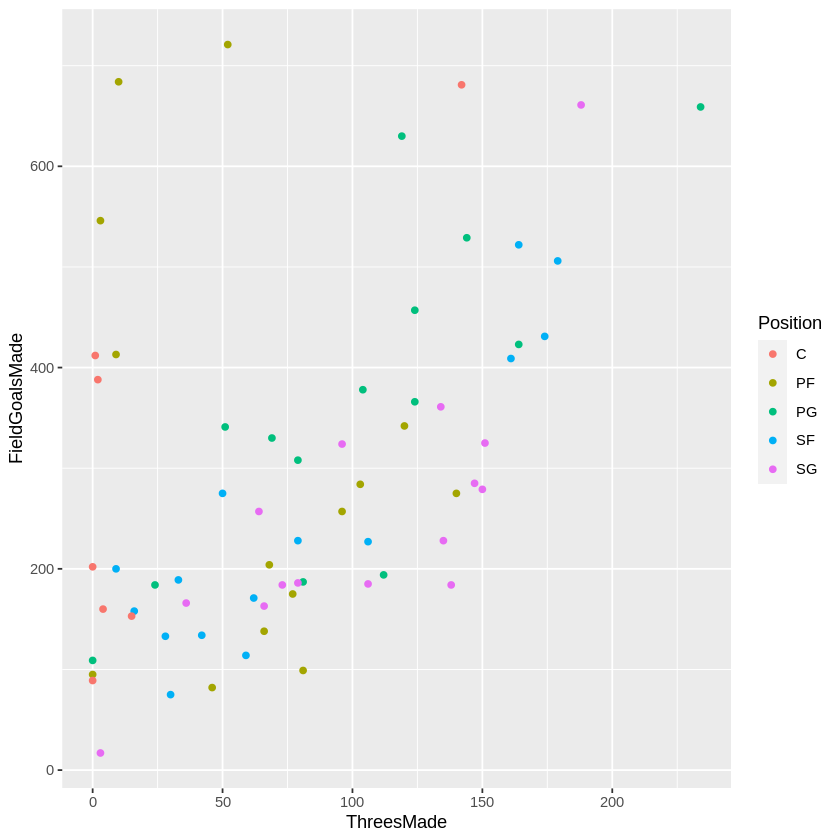

In [79]:
# 總出手得分次數:三分出手得分次數, 以位置區分顏色
qplot(
  ThreesMade,
  FieldGoalsMade,
  data=filtered.data,
  color=Position
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



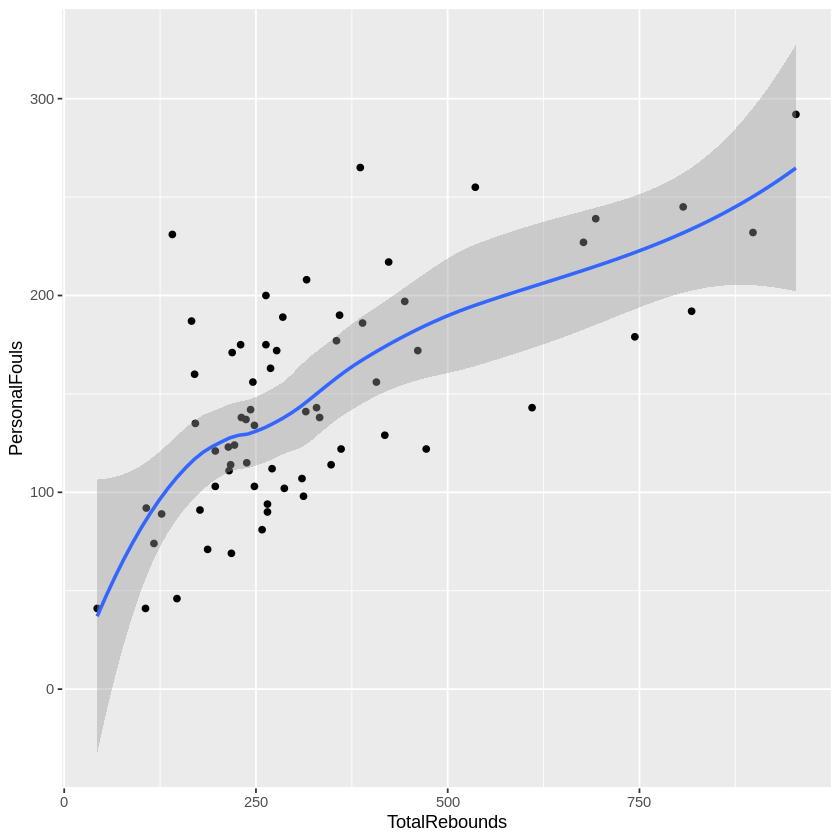

In [81]:
# 搶籃板(?)次數vs犯規(?)次數 的漸近線
qplot(
  data=filtered.data,
  TotalRebounds,
  PersonalFouls,
  geom = c("point", "smooth")
)

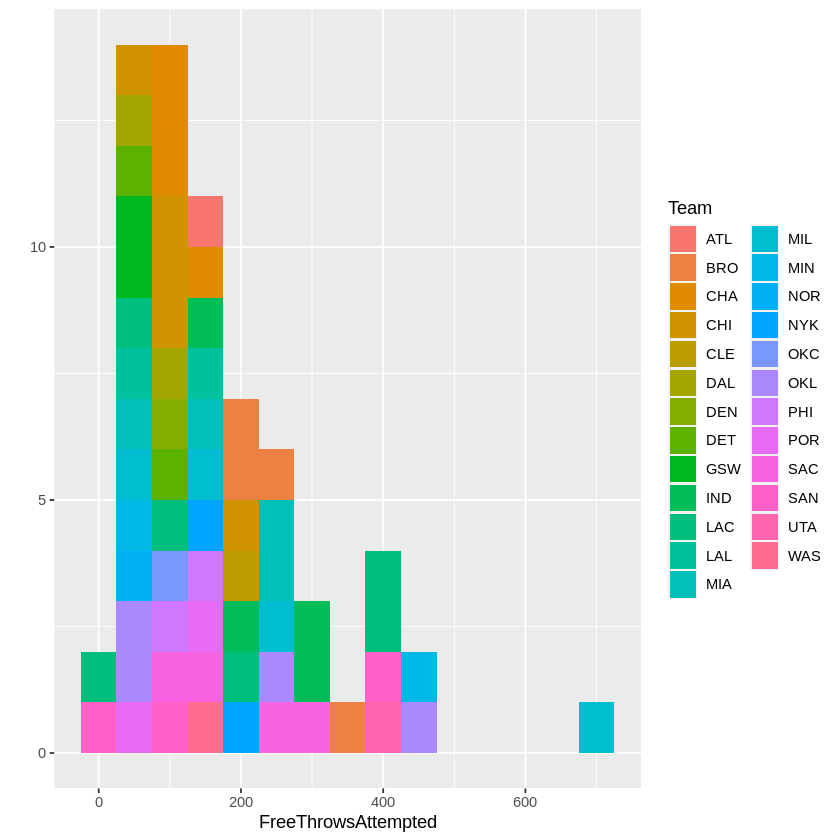

In [70]:
# 選手自由出手(?)的次數, 以隊伍區分顏色
qplot(
  data = filtered.data,
  FreeThrowsAttempted,
  fill = Team,
  binwidth = 50
)

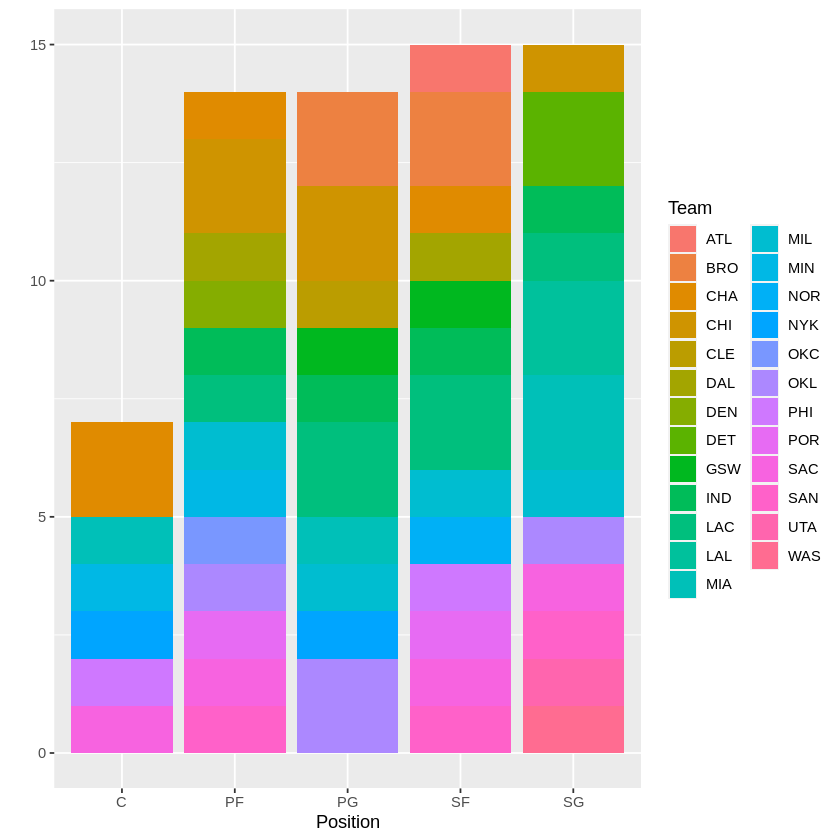

In [72]:
# 位置人數, 以隊伍區分顏色
qplot(
  data = filtered.data,
  Position,
  fill = Team
)